In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

features_df = pd.read_parquet("../data/contribution_data/extracted_features_v2.parquet")
features_df = features_df.sample(frac=1, random_state=42).reset_index(drop=True)

if features_df.columns.__contains__('xzcode'):
    # Split 'xzcode' column into two separate columns 'code' and 'level'
    features_df[['code', 'level']] = pd.json_normalize(features_df['xzcode'])
    features_df.drop('xzcode', axis=1, inplace=True)

if features_df.columns.__contains__('geometry'):
    features_df.drop('geometry', axis=1, inplace=True)

if features_df.columns.__contains__('osm_id'):
    features_df.drop('osm_id', axis=1, inplace=True)

if features_df.columns.__contains__('members'):
    features_df.drop('members', axis=1, inplace=True)

if features_df.columns.__contains__('status'):
    features_df.drop('status', axis=1, inplace=True)

if features_df.columns.__contains__('editor_used'):
    features_df.drop('editor_used', axis=1, inplace=True)
    
features_df.columns = features_df.columns.str.replace(' ', '_', regex=True)

X = features_df.drop('vandalism', axis=1).copy()
y = features_df['vandalism'].copy()
X_encoded = pd.get_dummies(X, columns=[
                                       'osm_type',
                                       'contribution_type',
                                       ])

y = y.replace(True, 1)
y = y.replace(False, 0)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42, stratify=y)


C:\Users\saise\AppData\Local\Temp\ipykernel_32756\1769199503.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(False, 0)


C:\Users\saise\AppData\Local\Temp\ipykernel_32756\2175290659.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


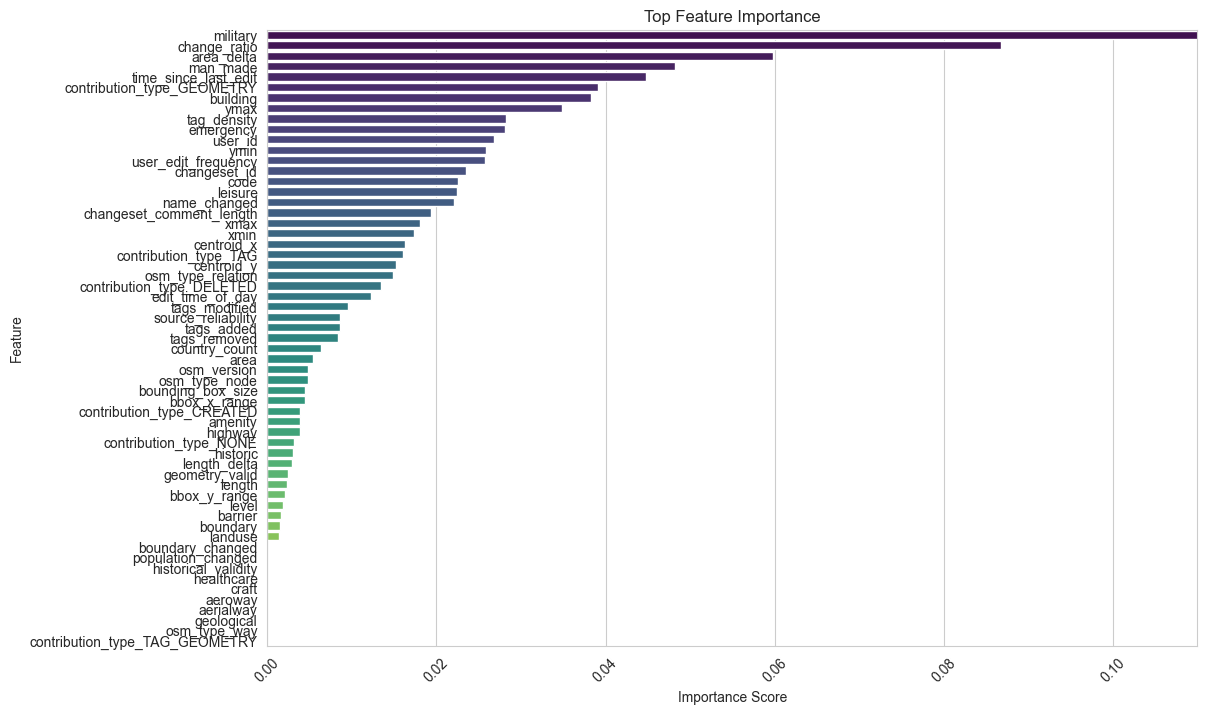

                           Feature  Importance
47                        military    0.180832
28                    change_ratio    0.086828
2                       area_delta    0.059814
46                        man_made    0.048249
12            time_since_last_edit    0.044797
55      contribution_type_GEOMETRY    0.039092
37                        building    0.038287
10                            ymax    0.034788
27                     tag_density    0.028240
39                       emergency    0.028113
0                          user_id    0.026779
11                            ymin    0.025829
1              user_edit_frequency    0.025691
31                    changeset_id    0.023549
48                            code    0.022494
45                         leisure    0.022479
17                    name_changed    0.022085
29        changeset_comment_length    0.019330
8                             xmax    0.018095
9                             xmin    0.017304
23           

In [20]:
import pickle  # or use joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model from the .pkl file
model_filename = '../saved_parameters/final_xgboost_model.pkl'  # Change this to your model's filename
with open(model_filename, 'rb') as file:
    final_model = pickle.load(file)

# Extract feature importances from the trained model
feature_importances = final_model.feature_importances_

# Create a DataFrame for better visualization
features = X_train.columns  # Assuming X_train is your DataFrame with feature names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Limit the number of features to display (e.g., top 20)
top_n = 60  # Change this to your desired number
importance_df = importance_df.head(top_n)

# Visualize feature importances
plt.figure(figsize=(12, 8))  # Increased figure size for better readability
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.xlim(0, 0.11)  # Set x-axis limit to a little above the max importance
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Print the feature importance DataFrame
print(importance_df)
